In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

# Data Pre Processing

In [2]:
data = pd.read_csv('seattle-weather.csv')

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.shape

(1461, 6)

In [5]:
data.set_index('date',inplace=True)

In [6]:
data.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

No Missing values present

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1453, 5)

No duplicate entries present

# EDA

In [9]:
data['weather'].value_counts()

rain       641
sun        632
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

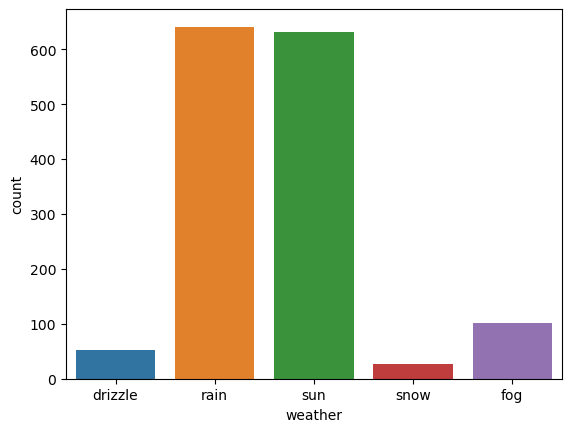

In [10]:
sns.countplot(x='weather',data=data)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1453.0,3.046111,6.694776,0.0,0.0,0.0,3.0,55.9
temp_max,1453.0,16.415967,7.346066,-1.6,10.6,15.6,22.2,35.6
temp_min,1453.0,8.224639,5.019831,-7.1,4.4,8.3,12.2,18.3
wind,1453.0,3.243634,1.440298,0.4,2.2,3.0,4.1,9.5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1453 non-null   float64
 1   temp_max       1453 non-null   float64
 2   temp_min       1453 non-null   float64
 3   wind           1453 non-null   float64
 4   weather        1453 non-null   object 
dtypes: float64(4), object(1)
memory usage: 100.4+ KB


In [13]:
cont_data = data.select_dtypes('float64').columns.tolist()

In [14]:
cont_data

['precipitation', 'temp_max', 'temp_min', 'wind']

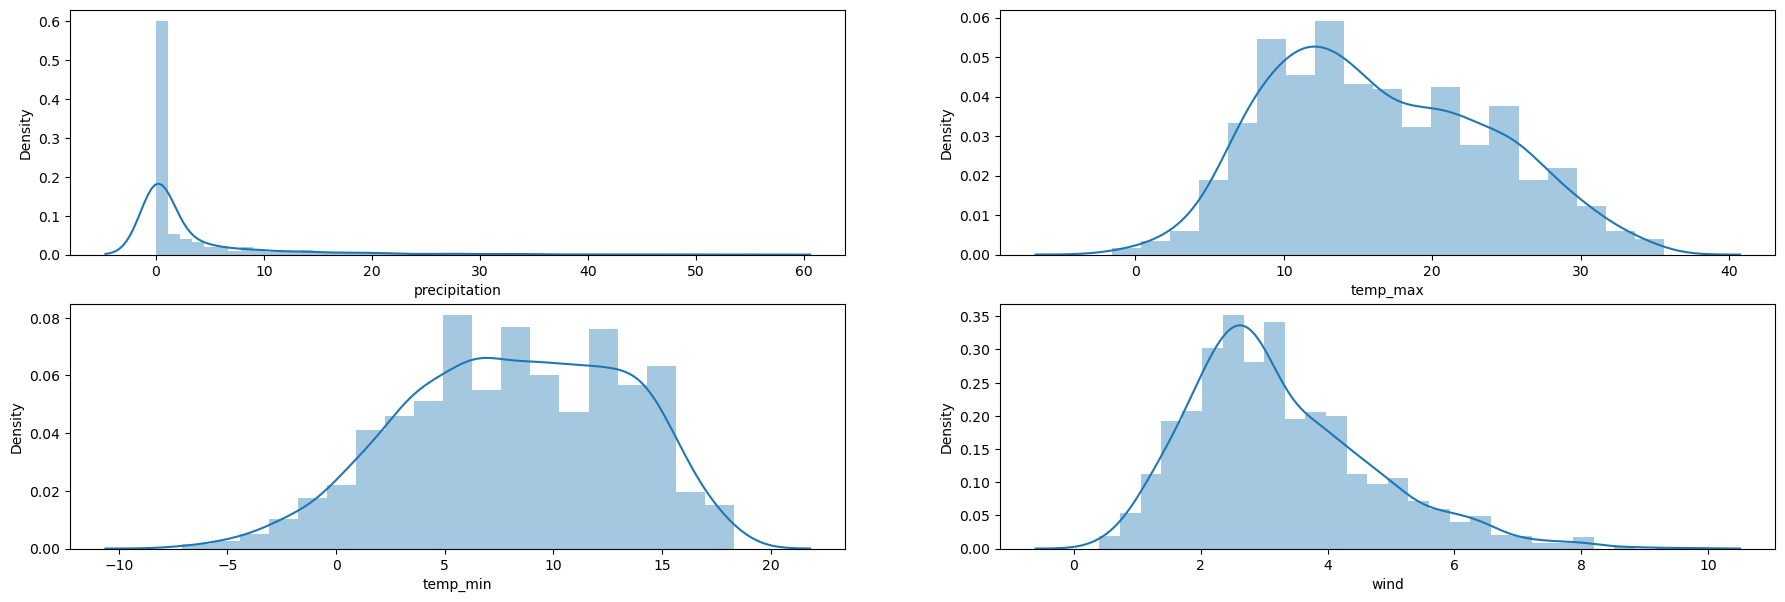

In [15]:
plt.figure(figsize=(22,7))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=4:
        plt.subplot(2,2,plotnumber)
        sns.distplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

data is not normally distributed

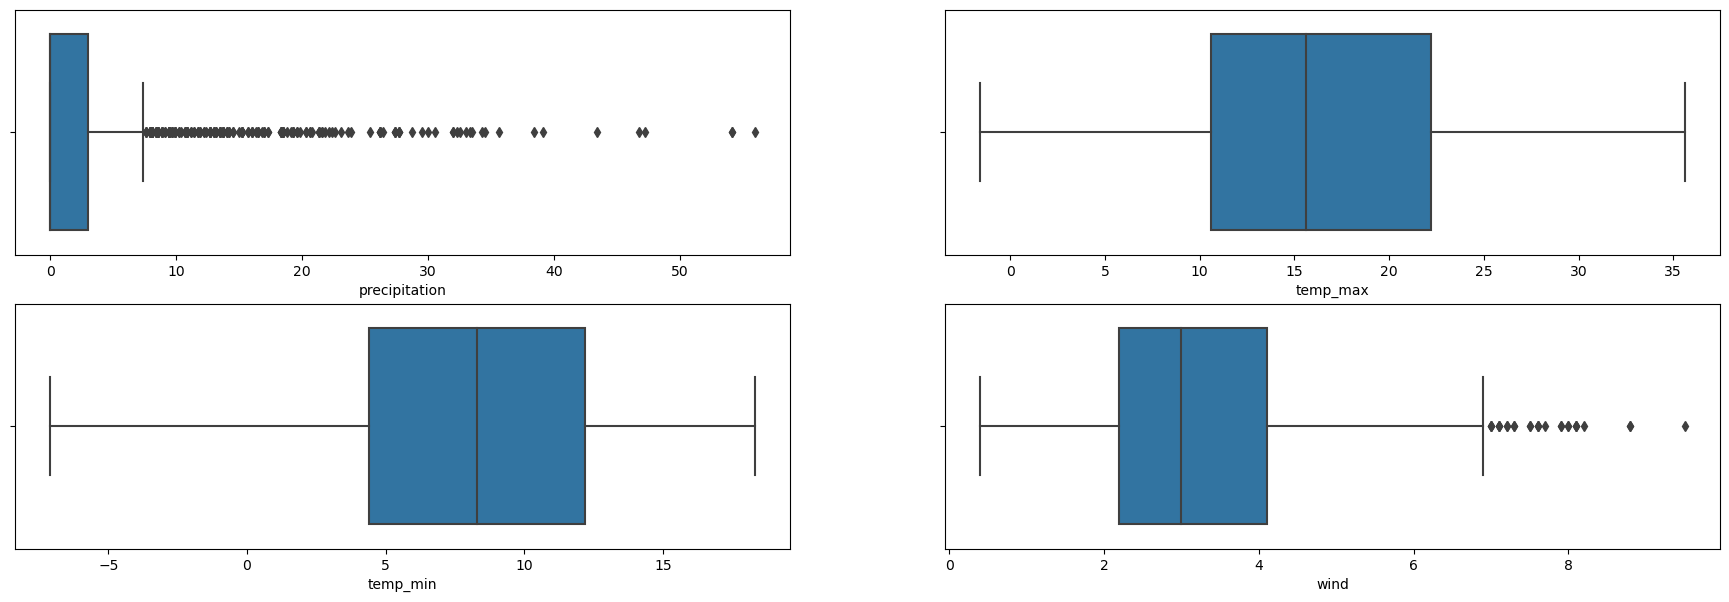

In [16]:
plt.figure(figsize=(22,7))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=4:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(x=data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

outliers are present

# Dealing iwth outliers

In [17]:
z = zscore(data[cont_data])

In [18]:
data = data[(z<3).all(axis=1)]

In [19]:
data.shape

(1404, 5)

In [20]:
data_loss = (1461-1411)/1461

In [21]:
data_loss

0.034223134839151265

# Feature Selection

In [22]:
le = LabelEncoder()

In [23]:
data['weather'] = le.fit_transform(data['weather'])

In [24]:
data.corr()['weather'].sort_values()

precipitation   -0.294519
wind            -0.039047
temp_min         0.155987
temp_max         0.317647
weather          1.000000
Name: weather, dtype: float64

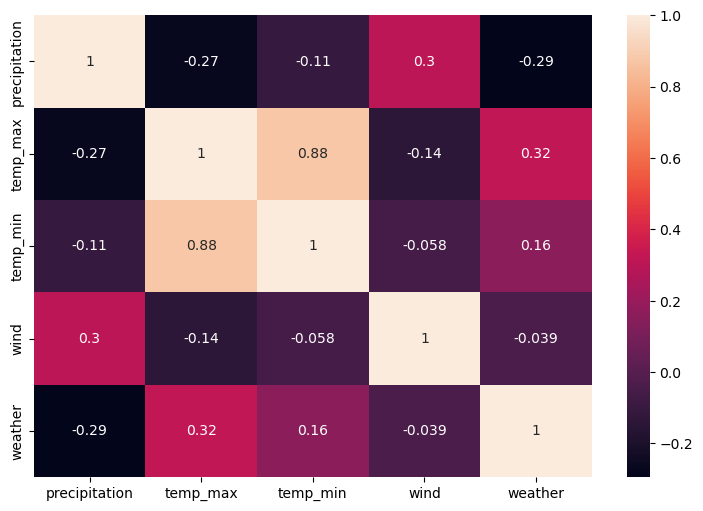

In [25]:
plt.figure(figsize=(9,6))

sns.heatmap(data.corr(),annot=True)

plt.show()

# Data Modeling

In [26]:
x = data.drop('weather',axis=1)

y = data['weather']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=666)

# LR

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
pred1 = lr.predict(x_train)

In [31]:
pred2 = lr.predict(x_test)

In [32]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred1)}')

TRAINING ACCURACY: 0.8432769367764915


In [33]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred2)}')

TEST ACCURACY: 0.8362989323843416


In [34]:
a1 = accuracy_score(y_train,pred1)

In [35]:
a2 = accuracy_score(y_test,pred2)

In [36]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.97      0.92      0.94       118
           3       1.00      0.25      0.40         4
           4       0.75      1.00      0.85       126

    accuracy                           0.84       281
   macro avg       0.54      0.43      0.44       281
weighted avg       0.76      0.84      0.78       281



In [37]:
print(confusion_matrix(y_test,pred2))

[[  0   0   0   0  11]
 [  0   0   0   0  22]
 [  0   0 108   0  10]
 [  0   0   3   1   0]
 [  0   0   0   0 126]]


In [38]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.835493136756482

In [133]:
f1_score(y_test,pred2,average='micro')

0.8362989323843416

# KNN

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
pred3 = knn.predict(x_train)

In [42]:
pred4 = knn.predict(x_test)

In [43]:
a4 = accuracy_score(y_train,pred3)

In [44]:
a5 = accuracy_score(y_test,pred4)

In [45]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred3)}')

TRAINING ACCURACY: 0.8272484416740873


In [46]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred4)}')

TEST ACCURACY: 0.7580071174377224


In [47]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.25      0.14      0.18        22
           2       0.86      0.85      0.85       118
           3       1.00      0.50      0.67         4
           4       0.72      0.86      0.79       126

    accuracy                           0.76       281
   macro avg       0.57      0.47      0.50       281
weighted avg       0.72      0.76      0.73       281



In [48]:
print(confusion_matrix(y_test,pred2))

[[  0   0   0   0  11]
 [  0   0   0   0  22]
 [  0   0 108   0  10]
 [  0   0   3   1   0]
 [  0   0   0   0 126]]


In [49]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.7215480427046262

In [134]:
f1_score(y_test,pred4,average='micro')

0.7580071174377224

# DT

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
pred5 = dt.predict(x_train)

In [53]:
pred6 = dt.predict(x_test)

In [54]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred5)}')

TRAINING ACCURACY: 0.9973285841495992


In [55]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred6)}')

TEST ACCURACY: 0.7686832740213523


In [56]:
a7 = accuracy_score(y_train,pred5)

In [57]:
a8 = accuracy_score(y_test,pred6)

In [58]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7393772241992883

In [59]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.15      0.14      0.14        22
           2       0.89      0.94      0.91       118
           3       0.75      0.75      0.75         4
           4       0.79      0.79      0.79       126

    accuracy                           0.77       281
   macro avg       0.52      0.52      0.52       281
weighted avg       0.75      0.77      0.76       281



In [60]:
print(confusion_matrix(y_test,pred6))

[[  0   2   0   0   9]
 [  4   3   3   0  12]
 [  1   0 111   1   5]
 [  0   0   1   3   0]
 [  2  15  10   0  99]]


In [135]:
f1_score(y_test,pred6,average='micro')

0.7686832740213524

# RF

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
pred7 = rf.predict(x_train)

In [64]:
pred8 = rf.predict(x_test)

In [65]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred7)}')

TRAINING ACCURACY: 0.9973285841495992


In [66]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred8)}')

TEST ACCURACY: 0.8327402135231317


In [67]:
a10 = accuracy_score(y_train,pred7)

In [68]:
a11 = accuracy_score(y_test,pred8)

In [69]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8105897305541433

In [70]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.17      0.05      0.07        22
           2       0.99      0.94      0.97       118
           3       1.00      0.75      0.86         4
           4       0.76      0.94      0.84       126

    accuracy                           0.83       281
   macro avg       0.58      0.54      0.55       281
weighted avg       0.78      0.83      0.80       281



In [71]:
print(confusion_matrix(y_test,pred8))

[[  0   0   0   0  11]
 [  1   1   0   0  20]
 [  0   0 111   0   7]
 [  0   0   1   3   0]
 [  2   5   0   0 119]]


In [136]:
f1_score(y_test,pred8,average='micro')

0.8327402135231317

# ADA

In [72]:
ada = AdaBoostClassifier()

In [73]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [74]:
pred9 = ada.predict(x_train)

In [75]:
pred10 = ada.predict(x_test)

In [76]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred9)}')

TRAINING ACCURACY: 0.7978628673196795


In [77]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred10)}')

TEST ACCURACY: 0.797153024911032


In [78]:
a13 = accuracy_score(y_train,pred9)

In [79]:
a14 = accuracy_score(y_test,pred10)

In [80]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.7963396034570412

In [81]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       1.00      0.05      0.09        22
           2       0.84      0.95      0.89       118
           3       1.00      0.75      0.86         4
           4       0.75      0.86      0.80       126

    accuracy                           0.80       281
   macro avg       0.72      0.52      0.53       281
weighted avg       0.78      0.80      0.75       281



In [82]:
print(confusion_matrix(y_test,pred10))

[[  0   0   0   0  11]
 [  0   1   2   0  19]
 [  0   0 112   0   6]
 [  0   0   1   3   0]
 [  0   0  18   0 108]]


In [137]:
f1_score(y_test,pred10,average='micro')

0.797153024911032

# GBDT

In [83]:
gb = GradientBoostingClassifier()

In [84]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [85]:
pred11 = gb.predict(x_train)

In [86]:
pred12 = gb.predict(x_test)

In [87]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred11)}')

TRAINING ACCURACY: 0.9091718610863758


In [88]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred12)}')

TEST ACCURACY: 0.8291814946619217


In [89]:
a16 = accuracy_score(y_train,pred11)

In [90]:
a17 = accuracy_score(y_test,pred12)

In [91]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.8219776309100151

In [92]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.20      0.05      0.07        22
           2       0.98      0.92      0.95       118
           3       1.00      0.50      0.67         4
           4       0.75      0.97      0.85       126

    accuracy                           0.83       281
   macro avg       0.59      0.49      0.51       281
weighted avg       0.78      0.83      0.79       281



In [93]:
print(confusion_matrix(y_test,pred12))

[[  0   0   0   0  11]
 [  2   1   0   0  19]
 [  0   0 108   0  10]
 [  0   0   2   2   0]
 [  0   4   0   0 122]]


In [138]:
f1_score(y_test,pred12,average='micro')

0.8291814946619217

# XGBOOST

In [94]:
xg = XGBClassifier()

In [95]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [96]:
pred13 = xg.predict(x_train)

In [97]:
pred14 = xg.predict(x_test)

In [98]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred13)}')

TRAINING ACCURACY: 0.993766696349065


In [99]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred14)}')

TEST ACCURACY: 0.797153024911032


In [100]:
a19 = accuracy_score(y_train,pred13)

In [101]:
a20 = accuracy_score(y_test,pred14)

In [102]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7892272496187087

In [103]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.10      0.05      0.06        22
           2       0.95      0.92      0.93       118
           3       0.60      0.75      0.67         4
           4       0.77      0.89      0.82       126

    accuracy                           0.80       281
   macro avg       0.48      0.52      0.50       281
weighted avg       0.76      0.80      0.77       281



In [104]:
print(confusion_matrix(y_test,pred14))

[[  0   1   0   0  10]
 [  3   1   1   0  17]
 [  1   0 108   2   7]
 [  0   0   1   3   0]
 [  2   8   4   0 112]]


In [139]:
f1_score(y_test,pred14,average='micro')

0.797153024911032

# SVM

In [105]:
svm = SVC()

In [106]:
svm.fit(x_train,y_train)

SVC()

In [107]:
pred15 = svm.predict(x_train)

In [108]:
pred16 = svm.predict(x_test)

In [109]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred15)}')

TRAINING ACCURACY: 0.7764915405164737


In [110]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred16)}')

TEST ACCURACY: 0.7544483985765125


In [111]:
a22 = accuracy_score(y_train,pred15)

In [112]:
a23 = accuracy_score(y_test,pred16)

In [113]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.755729537366548

In [114]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.94      0.75      0.84       118
           3       0.00      0.00      0.00         4
           4       0.66      0.98      0.79       126

    accuracy                           0.75       281
   macro avg       0.32      0.35      0.32       281
weighted avg       0.69      0.75      0.70       281



In [115]:
print(confusion_matrix(y_test,pred16))

[[  0   0   0   0  11]
 [  0   0   0   0  22]
 [  0   0  89   0  29]
 [  0   0   3   0   1]
 [  0   0   3   0 123]]


In [140]:
f1_score(y_test,pred16,average='micro')

0.7544483985765126

In [116]:
train = []
test = []
cv = []

In [117]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [118]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [119]:
result = pd.DataFrame({'MODEL':model,'TRAIN SCORE':train,'TEST SCORE':test,'CV SCORE':cv})

In [120]:
result

,MODEL,TRAIN SCORE,TEST SCORE,CV SCORE
0,LR,0.843277,0.836299,0.835493
1,KNN,0.827248,0.758007,0.721548
2,DT,0.997329,0.768683,0.739377
3,RF,0.997329,0.832740,0.810590
4,ADA,0.797863,0.797153,0.796340
5,GBDT,0.909172,0.829181,0.821978
6,XGBOOST,0.993767,0.797153,0.789227
7,SVM,0.776492,0.754448,0.755730


we take f1 score as the scoring parameter and we are getting the best f1 score for LR model

# HYPER PARAMETER TUNING

In [141]:
lr = LogisticRegression()

In [142]:
para = {'penalty':['l1', 'l2', 'elasticnet'],
       'C':[0.01,0.1,1,1.1],
       'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
       'multi_class':['auto', 'ovr', 'multinomial'],
       'max_iter':[100,200,300,400,500]}

In [143]:
gs = GridSearchCV(lr,para,n_jobs=-1)

In [144]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 1.1],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [145]:
gs.best_params_

{'C': 1,
 'max_iter': 500,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'saga'}

In [146]:
gs.best_estimator_.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=500, penalty='l1', solver='saga')

In [150]:
trainpred = gs.best_estimator_.predict(x_train)

In [151]:
testpred = gs.best_estimator_.predict(x_test)

In [166]:
testpred_proba = gs.best_estimator_.predict_proba(x_test)

In [154]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,trainpred)}')

TRAINING ACCURACY: 0.8441674087266251


In [156]:
print(f'TEST ACCURACY: {accuracy_score(y_test,testpred)}')

TEST ACCURACY: 0.8362989323843416


In [157]:
cv = cross_val_score(gs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.8369166243009658

In [158]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.97      0.92      0.94       118
           3       1.00      0.25      0.40         4
           4       0.75      1.00      0.85       126

    accuracy                           0.84       281
   macro avg       0.54      0.43      0.44       281
weighted avg       0.76      0.84      0.78       281



In [159]:
print(confusion_matrix(y_test,testpred))

[[  0   0   0   0  11]
 [  0   0   0   0  22]
 [  0   0 108   0  10]
 [  0   0   3   1   0]
 [  0   0   0   0 126]]


In [161]:
f1_score(y_test,testpred,average='micro')

0.8362989323843416

In [167]:
roc_auc_score(y_test,testpred_proba,multi_class='ovr')

0.8860288841352938